# Dataset and Preprocessing
--------------------------------------------------------------------------

### Import Statements
-------------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.manifold import TSNE
%pylab inline
from IPython.display import Markdown, display
#For displaying titles
def printmrdwn(string):
    display(Markdown(string))
#To disable scroll bar    
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }
# %load_ext disable_autoscroll


### Function to plot the dataset (t-SNE)
--------------------------------------------------------

In [ ]:
def plot_data(Dataset_name,X_data,y_target):
    model =TSNE(n_components=2,random_state=0,perplexity=30,n_iter=1000)
    tsne_data=model.fit_transform(X_data)
    tsne_datastack=np.vstack((tsne_data.T,y_target)).T
    tsne_df=pd.DataFrame(data=tsne_datastack,columns=("Dim_1","Dim_2","class"))
    sn=sns.FacetGrid(tsne_df,hue="class",size=4)
    sn.map(plt.scatter,'Dim_1','Dim_2',alpha=1, 
          edgecolor='white', linewidth=0.25, s=100).add_legend(title="class")
    plt.axis('off')
    plt.title(Dataset_name)
    plt.show()

### Dataset 1-  **Titanic DataSet**
***********************************************
**Preprocessing method**

In [ ]:
#Titanic Dataset
#https://www.kaggle.com/c/titanic/data
def get_titanic_data():
    df_titanic=pd.read_csv('titanic.csv',)
    #Remove unnecessary columns (body= Body Indentification number, Name= Name)
    df_titanic.drop(['name','body'],1,inplace=True)
    #Fill all the na  
    df_titanic.cabin.fillna('unknown',inplace=True)
    df_titanic.age.fillna(df_titanic['age'].mean(),inplace=True)
    df_titanic.fillna(0,inplace=True)
    #Covert nonnumeric value into numeric
    df_titanic['sex'] = LabelEncoder().fit_transform(df_titanic['sex'])
    df_titanic['cabin'] = LabelEncoder().fit_transform(df_titanic['cabin'].astype(str))
    df_titanic['embarked'] = LabelEncoder().fit_transform(df_titanic['embarked'].astype(str))
    df_titanic['home.dest'] = LabelEncoder().fit_transform(df_titanic['home.dest'].astype(str))
    df_titanic['ticket'] = LabelEncoder().fit_transform(df_titanic['ticket'])
    df_titanic['boat'] = LabelEncoder().fit_transform(df_titanic['boat'].astype(str))
    # df_titanic.head()
    # df_titanic.dtypes
    # print(df_titanic.isnull().sum())
    X = df_titanic.drop("pclass", axis = 1)
    y = df_titanic['pclass']
    print("\n** Titanic Dataset **\n\n",X.head())
    print("\n** Class Column **\n",y.head())    
    return X,y

**Visualizing the dataset using t-SNE**

In [ ]:
X_titanic,y_titanic=get_titanic_data()
plot_data("Titanic Data",X_titanic,y_titanic)

### Dataset 2- Breast Cancer Dataset
***********************************************
**Preprocessing method**

In [ ]:
#Breast Cancer Dataset
#http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
def get_breastCancer_dataset():

    df_cancer=pd.read_csv('breast-cancer-wisconsin.csv')
    printmrdwn("Data Description")
    print(df_cancer.describe())
    df_cancer['Bare_Nuclei'] = LabelEncoder().fit_transform(df_cancer['Bare_Nuclei'])
    df_cancer= df_cancer.drop("ID_Number", axis = 1)
    printmrdwn("Data Distribution")
    df_cancer['Class'].value_counts().sort_index().plot.bar()
    plt.show()
    printmrdwn("Data Types")
    print(df_cancer.dtypes)
    y = df_cancer['Class']
    X = df_cancer.drop("Class", axis = 1)
    printmrdwn("Breast Cancer Dataset")
    print(X.head())
    printmrdwn("Class Column")
    print(y.head()) 
    return X, y

In [ ]:
X_breastCancer,y_breastCancer=get_breastCancer_dataset()
plot_data("Breast Cancer",X_breastCancer,y_breastCancer)

### Dataset 3- Glass Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_glass():
    #Reading dataset from the csv file
    df_glass=pd.read_csv('glass.csv')
    printmrdwn("Data Description")
    print(df_glass.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_glass.index)
    df_glass=df_glass.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_glass['Type'].value_counts().sort_index().plot.bar()
    plt.show()
    printmrdwn("Data Types")
    print(df_glass.dtypes)
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_glass.drop('Type', axis = 1)
    y=df_glass['Type']
    printmrdwn("Glass Dataset",)
    print(X.head())
    printmrdwn("Class Column")
    print(y.head()) 
    #feature_list=dataset_data.columns
    return X, y

In [ ]:
X_glass,y_glass=get_glass()
plot_data("Glass Dataset",X_glass,y_glass)

### Dataset 4- Audit Dataset
***********************************************
**Preprocessing method**

In [ ]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/00475/
#Audit Dataset
def get_auditData():
    #Reading dataset from the csv file
    df_auditrisk=pd.read_csv('audit_risk.csv')
    printmrdwn("Data Description")
    print(df_auditrisk.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_auditrisk.index)
    df_auditrisk=df_auditrisk.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_auditrisk['Risk'].value_counts().sort_index().plot.bar()
    # print(df_auditrisk.isna().sum())
    df_auditrisk.Money_Value.fillna(0,inplace=True)
    plt.show()    
    df_auditrisk['LOCATION_ID'] = LabelEncoder().fit_transform(df_auditrisk['LOCATION_ID'])
    printmrdwn("Data Types")
    print(df_auditrisk.dtypes)
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_auditrisk.drop('Risk', axis = 1)
    y=dataset['Risk']
    printmrdwn("Audit Dataset")
    print(X.head())
    printmrdwn("Risk Column")
    print(y.head()) 
    return(X,y)

In [ ]:
X_audit,y_audit=get_auditData()
plot_data("Audit Dataset",X_audit,y_audit)

### Dataset 5- Car Dataset
***********************************************
**Preprocessing method**

In [ ]:
#Car Dataset
#https://archive.ics.uci.edu/ml/datasets/car+evaluation
def get_car():
    #Reading dataset from the csv file
    df_car=pd.read_csv('car.csv')
    printmrdwn("Data Description")
    print(df_car.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_car.index)
    df_car=df_car.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_car['Class'].value_counts().sort_index().plot.bar()
    plt.show() 
    printmrdwn("Nan Values if any")
    print(df_car.isna().sum())
    printmrdwn("Data Types")
    print(df_car.dtypes)
    printmrdwn("Data Set")
    print(df_car.head(5))
    #Encoding for ordinal value
    printmrdwn("After Ordinal Encoding")
    df_car['Buying'] = ce.OrdinalEncoder().fit_transform(df_car['Buying'])
    df_car['Buying'] = ce.OrdinalEncoder().fit_transform(df_car['Buying'])
    df_car['Maintance'] = ce.OrdinalEncoder().fit_transform(df_car['Maintance'])
    df_car['Doors'] = ce.OrdinalEncoder().fit_transform(df_car['Doors'])
    df_car['Persons'] = ce.OrdinalEncoder().fit_transform(df_car['Persons'])
    df_car['Lug_boot'] = ce.OrdinalEncoder().fit_transform(df_car['Lug_boot'])
    df_car['Sfety'] = ce.OrdinalEncoder().fit_transform(df_car['Sfety'])
    printmrdwn("Modified Data Types")
    print(df_car.dtypes)
    printmrdwn("Modified Data")
    print(df_car.head(5))
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_car.drop('Class', axis = 1)
    y=df_car['Class']
    printmrdwn("Car Dataset")
    print(X.head(5))
    printmrdwn("Class Column")
    print(y.head(5))    
    return X, y

In [ ]:
X_car,y_car=get_car()
plot_data("Car Dataset",X_car,y_car)

### Dataset 6- Vote Dataset
***********************************************
**Preprocessing method**

In [257]:
#Vote Dataset
#https://archive.ics.uci.edu/ml/datasets/congressional+voting+records
def get_voteData():
    #Reading dataset from the csv file
    df_vote=pd.read_csv('house_votes.csv')
    printmrdwn("Data Description")
    print(df_vote.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_vote.index)
    df_vote=df_vote.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_vote['Class'].value_counts().sort_index().plot.bar()
    plt.show() 
    printmrdwn("Nan Values if any")
    print(df_vote.isna().sum())
    printmrdwn("Data Types")
    print(df_vote.dtypes)
    printmrdwn("Data Set")
    print(df_vote.head(5))
    #Here in this dataaset we have question marks. I am not handling question mark. Considering the question mark as another categorical varable
    #Encoding for ordinal value
    printmrdwn("After Ordinal Encoding")
    df_vote= ce.OrdinalEncoder().fit_transform(df_vote)
    printmrdwn("Modified Data Types")
    print(df_vote.dtypes)
    printmrdwn("Modified Data")
    print(df_vote.head(5))
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_vote.drop('Class', axis = 1)
    y=df_vote['Class']
    printmrdwn("Vote Dataset")
    print(X.head(5))
    printmrdwn("Class Column")
    print(y.head(5))    
    return X, y

Data Description

           Class handicapped-infants water-project-cost-sharing  \
count        435                 435                        435   
unique         2                   3                          3   
top     democrat                   n                          y   
freq         267                 236                        195   

       adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
count                                435                  435             435   
unique                                 3                    3               3   
top                                    y                    n               y   
freq                                 253                  247             212   

       religious-groups-in-schools anti-satellite-test-ban  \
count                          435                     435   
unique                           3                       3   
top                              y                       y   
freq      

Data Distribution

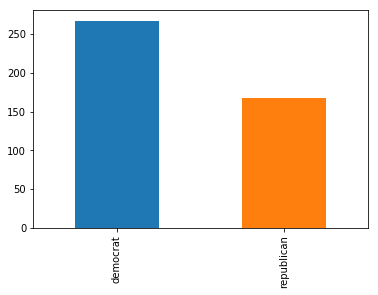

Nan Values if any

Class                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64


Data Types

Class                                     object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object


Data Set

          Class handicapped-infants water-project-cost-sharing  \
348    democrat                   y                          n   
201    democrat                   y                          y   
122  republican                   n                          n   
407    democrat                   n                          n   
256  republican                   n                          n   

    adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
348                                 y                    n               n   
201                                 y                    n               n   
122                                 n                    y               y   
407                                 n                    y               y   
256                                 n                    y               y   

    religious-groups-in-schools anti-satellite-test-ban  \
348                           n                       y   
201             

After Ordinal Encoding

Modified Data Types

Class                                     int32
handicapped-infants                       int32
water-project-cost-sharing                int32
adoption-of-the-budget-resolution         int32
physician-fee-freeze                      int32
el-salvador-aid                           int32
religious-groups-in-schools               int32
anti-satellite-test-ban                   int32
aid-to-nicaraguan-contras                 int32
mx-missile                                int32
immigration                               int32
synfuels-corporation-cutback              int32
education-spending                        int32
superfund-right-to-sue                    int32
crime                                     int32
duty-free-exports                         int32
export-administration-act-south-africa    int32
dtype: object


Modified Data

     Class  handicapped-infants  water-project-cost-sharing  \
348      1                    1                           1   
201      1                    1                           2   
122      2                    2                           1   
407      1                    2                           1   
256      2                    2                           1   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
348                                  1                     1                1   
201                                  1                     1                1   
122                                  2                     2                2   
407                                  2                     2                2   
256                                  2                     2                2   

     religious-groups-in-schools  anti-satellite-test-ban  \
348                            1                        1   
201         

Vote Dataset

     handicapped-infants  water-project-cost-sharing  \
348                    1                           1   
201                    1                           2   
122                    2                           1   
407                    2                           1   
256                    2                           1   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
348                                  1                     1                1   
201                                  1                     1                1   
122                                  2                     2                2   
407                                  2                     2                2   
256                                  2                     2                2   

     religious-groups-in-schools  anti-satellite-test-ban  \
348                            1                        1   
201                            1                      

Class Column

348    1
201    1
122    2
407    1
256    2
Name: Class, dtype: int32


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


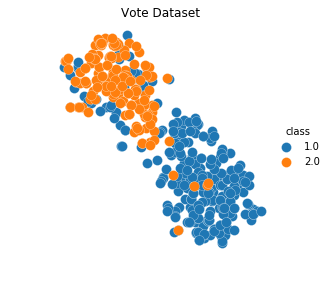

In [258]:
X_vote,y_vote=get_voteData()
plot_data("Vote Dataset",X_vote,y_vote)

### Dataset 7- Sonar Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_mnist():
    mnist = pickle.load( open( "./mldata/mnist.p", "rb" ) )
    X = mnist.data
    y = le.fit_transform(mnist.target)
    return X, y

### Dataset 8- BlackFriday Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_breast_cancer():
    data = datasets.load_breast_cancer()
    return data.data, data.target

### Dataset 9-  Dataset
***********************************************
**Preprocessing method**

In [ ]:
def mouse_protein_data():
    df = pd.read_excel('./mldata/Mice-protein/Data_Cortex_Nuclear.xls')
    y = le.fit_transform(df['class'].values)
    df['MouseID'] = le.fit_transform(df['MouseID'])
    df['Genotype'] = le.fit_transform(df['Genotype'])
    df['Treatment'] = le.fit_transform(df['Treatment'])
    df['Behavior'] = le.fit_transform(df['Behavior'])
    df = df.fillna('both')
    X = df.ix[:,1:81].as_matrix()
    return X, y

### Dataset 10-  Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_forest_coverage():
    train = pd.read_csv('./mldata/forests_coverage/train.csv')
#    test = pd.read_csv('./mldata/forests_coverage/test.csv')

    keys = list(train.keys())[1:-1]
    y_train = le.fit_transform(train['Cover_Type'])
    X_train = np.zeros(shape=(train.shape[0], len(keys)), dtype=int)
    for i, key in enumerate(keys):
        X_train[:,i] = le.fit_transform(train[key])
#    y_test = le.fit_transform(test['Cover_Type'])
#    X_test = np.zeros(shape=(test.shape[0], len(keys)), dtype=int)
#    for i, key in enumerate(keys):
#        X_test[:,i] = le.fit_transform(test[key])
    return X_train, y_train

### Dataset 11-  Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_breast_tissue():
    df = pd.read_excel('./mldata/breast_tissue/Data.xlsx')
    y = le.fit_transform(df['Class'])
    X = df.ix[:,2::].as_matrix()
    return X, y

### Dataset 11-  Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_wine_quality(color):
    if(color=='red'):
        df = pd.read_csv('./mldata/wine_quality/winequality-red.csv',sep=';')
    else:
        df = pd.read_csv('./mldata/wine_quality/winequality-white.csv',sep=';')
    X = df.ix[:,0:11].as_matrix()
    y = le.fit_transform(df['quality'].as_matrix())
    return X, y

### Dataset 12-  Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_leaf_data():
    df = pd.read_csv('./mldata/leaf/leaf_mod.csv')
    y = df['Class'].values
    X = df.ix[:,2:].as_matrix()
    return X, y

### Dataset 13-  Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_digits():
    digits = datasets.load_digits()
    # To apply a classifier on this data, we need to flatten the image, to
    # turn the data in a (samples, feature) matrix:
    n_samples = len(digits.images)
    X = digits.images.reshape((n_samples, -1))
    y = digits.target
    return X, y

### Dataset 14-  Dataset
***********************************************
**Preprocessing method**

In [ ]:
def get_abalone():
    df = pd.read_csv('mldata/abalone.csv')
    df['Sex'] = le.fit_transform(df['Sex'])
    X = df.ix[:,1:10].as_matrix()
    r = df['Rings']
    y = np.zeros(X.shape[0],dtype=int)
    for i in range(X.shape[0]):
        if(1<=r[i]<=8):
            y[i] = 0
        elif(9<=r[i]<=10):
            y[i] = 1
        else:
            y[i] = 2
    return X, y

### Dataset 15-  Dataset
***********************************************
**Preprocessing method**